# ***Table of Contents***

- <b>[Section 1 Import Libraries and Dataset Overview](#1)</b>
- <b>[Section 2 EDA](#2)</b>
- <b>[Section 3 Feature Engineering](#3)</b>

## ***Objectives:***
- Detect any hospital that may abuse the resources.
- Detect any hospital that may abuse the resources compared to its peers.
- Detect any hospital that may abuse the resources compared to the average (median etc) of its peers.
- Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and State.


## ***Methods of Fraud Detection in Healthcare: FWA***

### ***Fraud:*** 
    Fraud refers to intentional deception or misrepresentation for personal gain or to cause harm to others. It involves deliberately manipulating facts, figures, or information to obtain financial, material, or other benefits through deceitful means. In healthcare, examples of fraud may include submitting false claims, billing for services not rendered, or engaging in kickback schemes.
### ***Waste:***
    Waste refers to the inefficient or unnecessary use of resources that leads to their unnecessary depletion or loss. It involves practices that result in the squandering of resources without providing any meaningful benefits. In healthcare, waste can occur through excessive testing, unnecessary procedures, overprescribing medications, or inefficient administrative processes.
### ***Abuse:***
    Abuse refers to actions that go against standard practices or professional guidelines and result in the misuse, excessive use, or improper treatment of resources or individuals. It involves practices that may not be intentionally fraudulent but still deviate from accepted norms, leading to potential harm or financial losses. In healthcare, abuse can include overcharging for services, prescribing unnecessary treatments, or improper use of medical facilities or equipment.

For this project, I want to construct features based on FWA principle, and the following dataset restructing and EDA will be proceeded based on such baseline. 

# ***Section 1 Import Libraries and Dataset Overview***<a class="lanru" id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("inpatientCharges.csv")
df.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


## ***Dataset Dictionary***

- ***DRG(Diagnosis Related Group):*** is a payment ***category*** that is used to classify patients for the purpose of reimbursing hospitals for each case in a given category with a fixed fee 
    DRG is based on:
        1. The principal ICD-9-CM diagnosis code
        2. ICD-9-CM surgical procedure code
        3. Age of patient
        4. Expected length of stay in the hospital



- ***Total discharges:*** The number of discharges billed by the provider for inpatient hospital services. When you leave a hospital after treatment, you go through a process called hospital discharge.

- ***Covered Charges:*** Charges for covered services that your health plan paid for. There may be a limit on covered charges if you receive services from providers outside your plan's network of providers. Covered Person - Any person covered under the plan. Covered Service - A healthcare provider’s service or medical supplies covered by your health plan. Benefits will be given for these services based on your plan.

- ***Total Covered Charge Amount*** = the sum of all covered charges
 
- ***Average Covered Charges*** = Total Covered Charge Amount / Total Discharges

Payment is the amount a hospital actually receives for providing patient care. This is the actual amount paid to a hospital by consumers, insurers or governments. The sources of payment are:
1. Medicare and Medicaid
2. Private insurer if any 
3. The Patient

- ***Average Total Payments*** = Total Payments / Total Discharges
- ***Average Medicare Payments*** = Medicare Payment Amount / Total Discharges

### ***Modify Columns***

In [3]:
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df = df.drop('Average_Covered_Charges',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DRG                            163065 non-null  object
 1   Provider_Id                    163065 non-null  int64 
 2   Provider_Name                  163065 non-null  object
 3   Provider_StreetAddress         163065 non-null  object
 4   Provider_City                  163065 non-null  object
 5   Provider_State                 163065 non-null  object
 6   Provider_Zipcode               163065 non-null  int64 
 7   Hospital_referral_region_desp  163065 non-null  object
 8   Total_Discharges               163065 non-null  int64 
 9   Average_Total_Payments         163065 non-null  object
 10  Average_Medicare_Payment       163065 non-null  object
dtypes: int64(3), object(8)
memory usage: 13.7+ MB


### ***Change Datatypes***

In [5]:
df['DRG'] = df['DRG'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Average_Total_Payments'] = (df['Average_Total_Payments'].str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment'].str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/fh/q6gx0j6d0d5f_5pw7h91mcxc0000gn/T/ipykernel_13641/2232316502.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Total_Payments'] = (df['Average_Total_Payments'].str.replace(r'[^-+\d.]', '').astype(float))
/var/folders/fh/q6gx0j6d0d5f_5pw7h91mcxc0000gn/T/ipykernel_13641/2232316502.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment'].str.replace(r'[^-+\d.]', '').astype(float))


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


In [7]:
df.isnull().sum()

DRG                              0
Provider_Id                      0
Provider_Name                    0
Provider_StreetAddress           0
Provider_City                    0
Provider_State                   0
Provider_Zipcode                 0
Hospital_referral_region_desp    0
Total_Discharges                 0
Average_Total_Payments           0
Average_Medicare_Payment         0
dtype: int64

In [8]:
df.shape

(163065, 11)

### ***New Dataset***

In [9]:
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44


# ***Section 2 EDA***<a class="lanru" id="2"></a>

***Firstly look at the two monetary variables: avg_total_payment and avg_medicare_payment***

In [10]:
df['Average_Total_Payments'].describe()

count    163065.000000
mean       9707.473804
std        7664.642598
min        2673.000000
25%        5234.500000
50%        7214.100000
75%       11286.400000
max      156158.180000
Name: Average_Total_Payments, dtype: float64

In [11]:
df['Average_Medicare_Payment'].describe()

count    163065.000000
mean       8494.490964
std        7309.467261
min        1148.900000
25%        4192.350000
50%        6158.460000
75%       10056.880000
max      154620.810000
Name: Average_Medicare_Payment, dtype: float64

***Summary:***
From the .describe(), we can see the mean value of the two monetary features are similar. Let's visualize the distribution by histogram and box plot separetely.

### ***histplot***

***Average_Total_Payments***

<Axes: xlabel='Average_Total_Payments', ylabel='Count'>

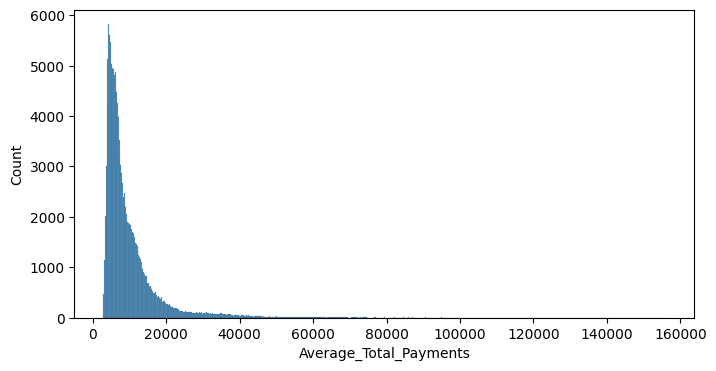

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df['Average_Total_Payments'])

***Average_Medicare_Payments***

<Axes: xlabel='Average_Medicare_Payment', ylabel='Count'>

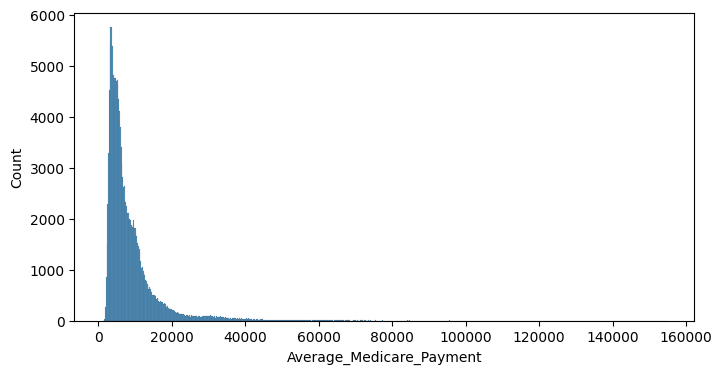

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['Average_Medicare_Payment'])

### ***Box plot***

<Axes: xlabel='Average_Total_Payments', ylabel='Count'>

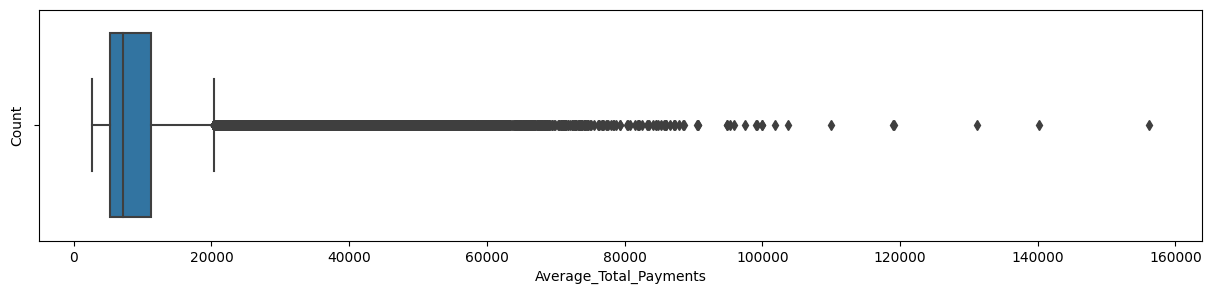

In [14]:
plt.figure(figsize=(15, 3))
plt.xlabel('Average_Total_Payments', fontsize=10)
plt.ylabel('Count', fontsize=10)

sns.boxplot(x = 'Average_Total_Payments', data = df) 

<Axes: xlabel='Average_Medicare_Payment', ylabel='Count'>

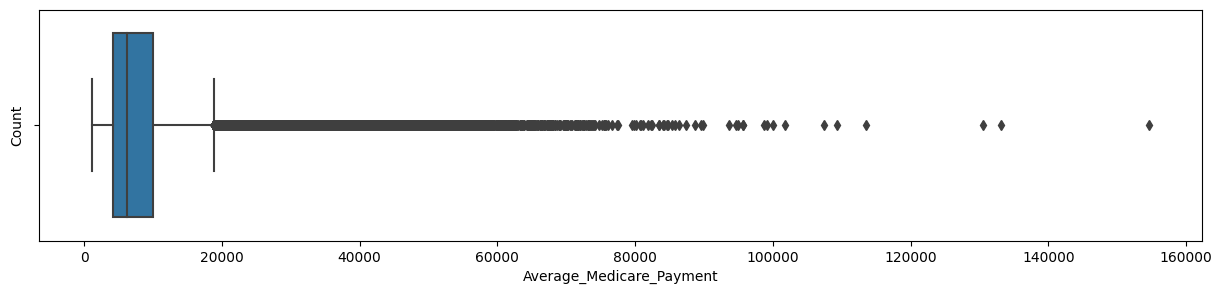

In [15]:
plt.figure(figsize=(15, 3))
plt.xlabel('Average_Medicare_Payment', fontsize=10)
plt.ylabel('Count', fontsize=10)

sns.boxplot(x = 'Average_Medicare_Payment', data = df) 

***Summary:***
From those 2 plots we can see 75% of the charges are under 10,000 dollar, but the highest charge amounts to 150k.


### ***Count by State***

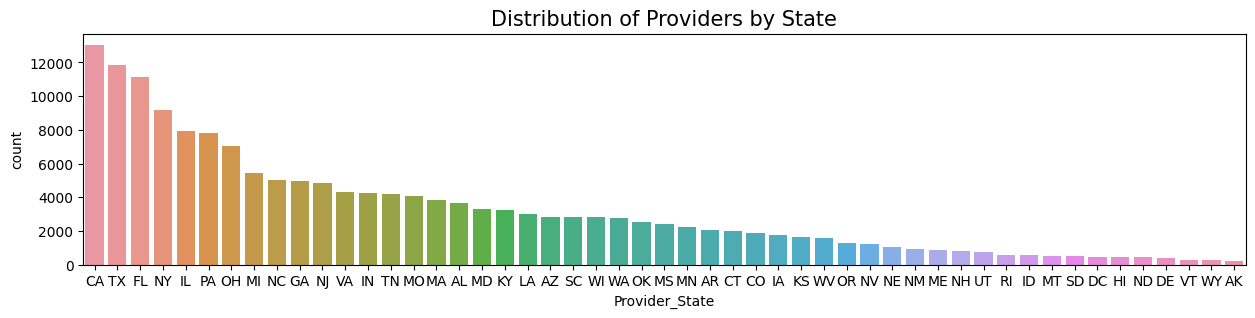

In [16]:
plt.figure(figsize=(15, 3))
plt.xlabel('Provider State', fontsize=10)
plt.ylabel('Count', fontsize=10)

sns.countplot(x='Provider_State', data=df, order=df['Provider_State'].value_counts().index)
plt.title('Distribution of Providers by State', fontsize=15)

plt.show()

***Summary:***
It's not surprisingly that CA, TX, and FL are the top3 providers, as these states have largest population base.

### ***Count by top 50 City***

In [17]:
df['Provider_City'].value_counts()

CHICAGO           1505
BALTIMORE         1059
HOUSTON            950
PHILADELPHIA       898
BROOKLYN           877
                  ... 
WOODLAND HILLS       1
MILAN                1
OAK FOREST           1
NORWAY               1
ZUNI                 1
Name: Provider_City, Length: 1977, dtype: int64

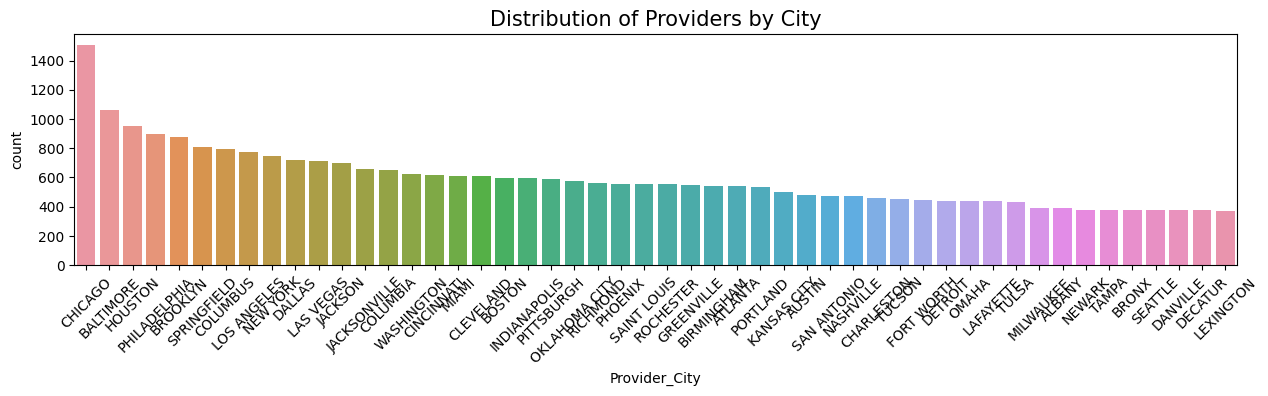

In [18]:
plt.figure(figsize=(15, 3))
plt.xlabel('Provider City', fontsize=10)
plt.ylabel('Count', fontsize=10)

ax = sns.countplot(x='Provider_City', data=df, order=df['Provider_City'].value_counts().index[:50])
plt.title('Distribution of Providers by City', fontsize=15)
# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

***Summary:***

Chicago, Baltimore, Houston, Philadelphia, and Brooklyn are the top 5 city providers. Except for the top 5, the rest cities in the top 50 records do not have large span differences. 

### ***Provider Name***

In [19]:
df.groupby('Provider_Name')['DRG'].count().sort_values(ascending=False)

Provider_Name
GOOD SAMARITAN HOSPITAL                       633
ST JOSEPH MEDICAL CENTER                      427
MERCY MEDICAL CENTER                          357
MERCY HOSPITAL                                347
ST JOSEPH HOSPITAL                            343
                                             ... 
OAK FOREST HOSPITAL                             1
FAIRWAY MEDICAL CENTER                          1
NORTHWEST TEXAS SURGERY CENTER                  1
FIRST STREET HOSPITAL LP                        1
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER      1
Name: DRG, Length: 3201, dtype: int64

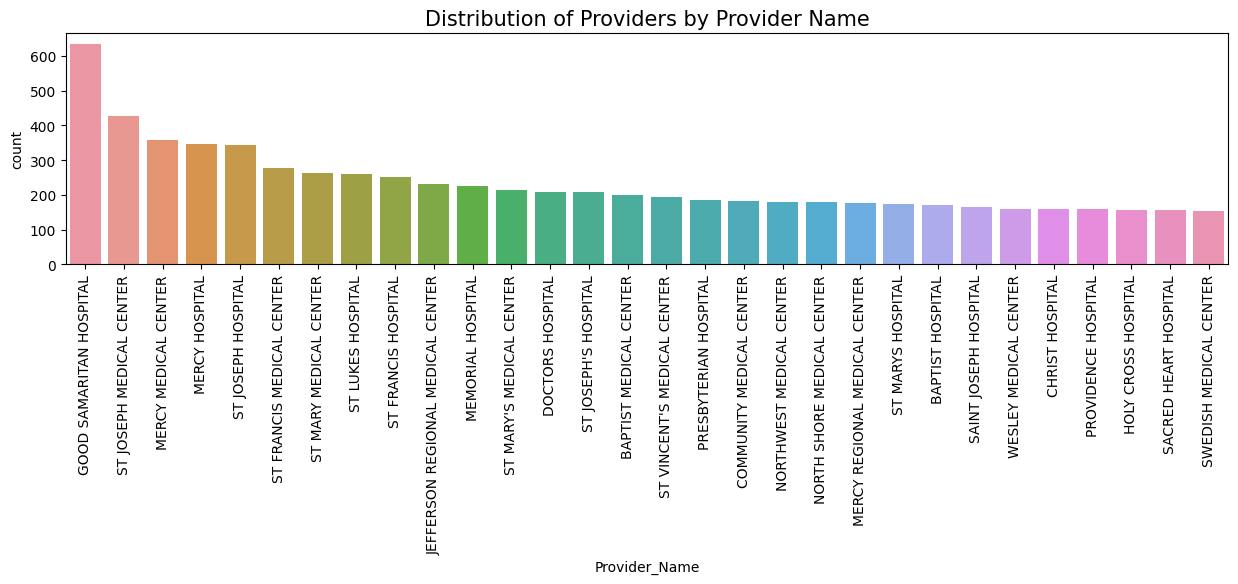

In [20]:
plt.figure(figsize=(15, 3))
plt.xlabel('Provider Name', fontsize=10)
plt.ylabel('Count', fontsize=10)

ax = sns.countplot(x='Provider_Name', data=df, order=df['Provider_Name'].value_counts().index[:30])
plt.title('Distribution of Providers by Provider Name', fontsize=15)
# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

***Summary:***
GOOD SAMARITAN HOSPITAL is the largest provider with 633 records, following by ST JOSEPH MEDICAL CENTER and MERCY MEDICAL CENTER.

## ***Average Medicare Payment by DRG***

In [21]:
df.groupby('DRG')['Average_Total_Payments'].describe().reset_index()

,DRG,count,mean,std,min,25%,50%,75%,max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.0,6960.534004,1477.873952,4968.00,6001.8300,6582.890,7516.825,18420.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201.0,6706.276445,2033.965862,4194.09,5412.8700,6093.750,7345.360,25519.43
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659.0,13263.823032,3847.918207,8174.28,10762.2200,12084.700,14424.325,50882.40
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269.0,7922.671141,2084.658336,5368.73,6626.2700,7280.050,8503.060,26510.15
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806.0,5713.985221,1342.538675,3916.41,4819.3250,5326.025,6197.480,14744.05
...,...,...,...,...,...,...,...,...,...
95,885 - PSYCHOSES,613.0,6968.721876,2440.280958,4444.90,5477.2400,6155.560,7841.280,32200.77
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906.0,4949.907307,1462.463278,3172.44,3969.9675,4529.535,5440.675,18630.92
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843.0,10763.814413,2823.004637,6942.83,8851.4550,10062.280,11788.675,33251.14
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382.0,4485.378734,1154.328951,3040.72,3720.5725,4136.105,4879.390,12479.80


# ***Section 3 Feature Engineering***<a class="lanru" id="3"></a>

### ***Feature 1: State DRG & Payment Mean***

Grouping data by 'Provider_State' and 'DRG' columns and finding mean of 'Average_Total_Payments' column


In [26]:
df1 = df.groupby(['Provider_State', 'DRG'])['Average_Total_Payments'].mean().reset_index()
df1.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
df1

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,5592.210000
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,14977.910000
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,5574.375000


***Summary:***

If a provider in a particular state has a higher average payment, it suggests that the state may be utilizing resources in a manner that exceeds the average of other providers within the same state and DRG category.

## ***Feature 2: State DRG & payment std***

Group the DataFrame by Provider_State and DRG, then calculate the standard deviation of Average_Total_Payments


In [29]:
df2 = df.groupby(['Provider_State', 'DRG'])['Average_Total_Payments'].std().reset_index()
df2.columns = ['Provider_State','DRG','std_Payment_ByStateDRG']
df2

,Provider_State,DRG,std_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,5423.494870
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2743.936951
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1881.841638
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,NaN
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,NaN
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,217.258559


***Summary:***

If a provider in a specific state has both a higher average payment and a higher standard deviation in payments, it indicates that the state may not only be utilizing resources differently from its peers in the same DRG and state but also experiencing greater variation or inconsistency in payment patterns.

## ***Feature 3: State DRG & Medicare Payment Mean***

Group the DataFrame by 'Provider_State' and 'DRG', then calculate the mean of 'Average_Medicare_Payment'.


In [37]:
df3 = df.groupby(['Provider_State', 'DRG'])['Average_Medicare_Payment'].mean().reset_index()
df3.columns = ['Provider_State','DRG','Medicare_mean_ByStateDRG']
df3

,Provider_State,DRG,Medicare_mean_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,4705.000000
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,7168.250000
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,3954.390000


***Summary:***
If a provider in a particular state has a higher medicare payment, it suggests that the state may be utilizing medicare resources in a manner that exceeds the average of other providers within the same state and DRG category.

## ***Feature 4: State DRG & Medicare Payment std***

Feature 4 groups the data by state and DRG (diagnosis-related group), and calculates the standard deviation of Medicare payments for each group. It then creates a new dataframe with three columns: Provider_State, DRG, and Medicare_std_ByStateDRG. The output is a table with 5100 rows and 3 columns, showing the standard deviation of Medicare payments for each state and DRG combination. NaN indicates that there is no data available for that particular combination of state and DRG.

In [39]:
df4 = df.groupby(['Provider_State', 'DRG'])['Average_Medicare_Payment'].std().reset_index()
df4.columns = ['Provider_State','DRG','Medicare_std_ByStateDRG']
df4

,Provider_State,DRG,Medicare_std_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,5456.948091
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2937.109360
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1963.060422
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,NaN
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,NaN
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1360.134036


***Summary:***

If a provider in a specific state has both a higher medicare payment and a higher standard deviation in payments, it indicates that the state may not only be utilizing resources differently from its peers in the same DRG and state but also experiencing greater variation or inconsistency in payment patterns.


## ***Feature 5: Provider Location, City***

In this focal cell, the code is focused on identifying the top 100 provider cities based on how frequently they appear in the data. The code starts by getting a list of the top 100 provider cities using value_counts() and nlargest(). It then creates a new column called 'High_Provider_Location' in the original dataset df which indicates whether a provider's city is one of the top 100 provider cities.

In [53]:
top_provider_locations = df['Provider_City'].value_counts().nlargest(100).index
df['High_Provider_Location'] = df['Provider_City'].isin(top_provider_locations)
df5 = df[["Provider_City","High_Provider_Location"]]
df5

,Provider_City,High_Provider_Location
0,DOTHAN,False
1,BOAZ,False
2,FLORENCE,True
3,BIRMINGHAM,True
4,ALABASTER,False
...,...,...
163060,ROUND ROCK,False
163061,SAN ANTONIO,True
163062,KYLE,False
163063,SUNNYVALE,False


- Filter for those cities in high_provider_location

In [54]:
df5 = df.loc[df['High_Provider_Location'] == True, ["Provider_City", "High_Provider_Location"]]
df5

,Provider_City,High_Provider_Location
2,FLORENCE,True
3,BIRMINGHAM,True
7,BIRMINGHAM,True
12,BIRMINGHAM,True
15,DECATUR,True
...,...,...
163043,MADISON,True
163049,MILWAUKEE,True
163050,MILWAUKEE,True
163054,MILWAUKEE,True


***Summary:***

Unusually high concentrations of providers in specific areas can indicate potential fraud schemes such as kickbacks or collusion. Known fraud hotspots, identified through historical data and investigations, can help pinpoint locations where fraud is more prevalent. Unusual provider density within a location may suggest fraudulent activities like phantom clinics or the use of fake addresses.

## ***Feature 6: Unusual Variation in Total Discharges***

This code creates a new feature called "Unusual_Variation_Total_Discharges" by using a lambda function that standardizes the Total Discharges column and categorizes them as True or False based on whether they are more than two standard deviations away from the mean. The resulting dataframe shows the list of provider cities and whether or not they have unusually high variations in total discharges.

In [55]:
df['Unusual_Variation_Total_Discharges'] = df['Total_Discharges'].transform(lambda x: (x - x.mean()) / x.std()) > 2
df6 = df[["Provider_City","Unusual_Variation_Total_Discharges"]]
df6

,Provider_City,Unusual_Variation_Total_Discharges
0,DOTHAN,False
1,BOAZ,False
2,FLORENCE,False
3,BIRMINGHAM,False
4,ALABASTER,False
...,...,...
163060,ROUND ROCK,False
163061,SAN ANTONIO,False
163062,KYLE,False
163063,SUNNYVALE,False


In [56]:
df6 = df.loc[df['Unusual_Variation_Total_Discharges'] == True, ["Provider_City", "Unusual_Variation_Total_Discharges"]]
df6

,Provider_City,Unusual_Variation_Total_Discharges
394,WICHITA,True
795,OKLAHOMA CITY,True
1251,ORLANDO,True
1840,NEW YORK,True
2295,HUNTSVILLE,True
...,...,...
158851,COLUMBUS,True
158912,NORRISTOWN,True
158916,PROVIDENCE,True
161557,ORLANDO,True


***Summary:***

Providers who engage in fraudulent activities may manipulate the number of discharges to inflate claims or engage in unnecessary procedures. Unusual variations in total discharges compared to their peers in the same DRG and state can indicate potential fraud, warranting further investigation. 

## ***Feature 7: Provider Billing Patterns***

In this code, we are creating a new feature called "Inconsistent_Billing_Patterns". We are grouping the dataset by DRG (diagnosis-related group) and Provider_City and then applying a lambda function to determine if the number of unique Provider Names is greater than 1. If true, then that means the providers in that city are billing inconsistently, which could indicate potential fraudulent activity.

In [57]:
df['Inconsistent_Billing_Patterns'] = df.groupby(['DRG', 'Provider_City'])['Provider_Name'].transform(lambda x: x.nunique() > 1)
df7 = df[["Provider_City","Provider_Name","Inconsistent_Billing_Patterns"]]
df7

,Provider_City,Provider_Name,Inconsistent_Billing_Patterns
0,DOTHAN,SOUTHEAST ALABAMA MEDICAL CENTER,True
1,BOAZ,MARSHALL MEDICAL CENTER SOUTH,False
2,FLORENCE,ELIZA COFFEE MEMORIAL HOSPITAL,True
3,BIRMINGHAM,ST VINCENT'S EAST,True
4,ALABASTER,SHELBY BAPTIST MEDICAL CENTER,False
...,...,...,...
163060,ROUND ROCK,SETON MEDICAL CENTER WILLIAMSON,False
163061,SAN ANTONIO,METHODIST STONE OAK HOSPITAL,True
163062,KYLE,SETON MEDICAL CENTER HAYS,False
163063,SUNNYVALE,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,False


In [59]:
df7 = df.loc[df['Inconsistent_Billing_Patterns'] == True, ["Provider_City","Provider_Name","Inconsistent_Billing_Patterns"]]
df7

,Provider_City,Provider_Name,Inconsistent_Billing_Patterns
0,DOTHAN,SOUTHEAST ALABAMA MEDICAL CENTER,True
2,FLORENCE,ELIZA COFFEE MEMORIAL HOSPITAL,True
3,BIRMINGHAM,ST VINCENT'S EAST,True
7,BIRMINGHAM,UNIVERSITY OF ALABAMA HOSPITAL,True
9,GADSDEN,GADSDEN REGIONAL MEDICAL CENTER,True
...,...,...,...
163049,MILWAUKEE,"WHEATON FRANCISCAN, INC- ST JOSEPH",True
163050,MILWAUKEE,AURORA ST LUKES MEDICAL CENTER,True
163054,MILWAUKEE,FROEDTERT MEM LUTHERAN HSPTL,True
163055,KENOSHA,AURORA MED CTR KENOSHA,True


***Summary:***

Providers who engage in fraudulent activities often exhibit inconsistent billing patterns, such as billing for services not rendered or upcoding procedures to receive higher reimbursements. By examining billing patterns within specific DRGs and states, discrepancies can be identified that may indicate potential fraud.

## ***Feature 8:  Changes in Payment Trends***
In this code, a new feature called "Payment_Trend_Change" is being created. The dataset is being grouped by Provider_Id, and then a lambda function is applied to determine if the difference between the current row and the previous row value for Average_Total_Payments is greater than 0. If true, then that means the payment trend for that provider is increasing, otherwise, it is not changing or decreasing. The resulting dataframe only includes the columns Provider_Id, Average_Total_Payments, and Payment_Trend_Change.

In [60]:
df['Payment_Trend_Change'] = df.groupby(['Provider_Id'])['Average_Total_Payments'].transform(lambda x: x.diff() > 0)
df8 = df[["Provider_Id","Average_Total_Payments","Payment_Trend_Change"]]
df8

,Provider_Id,Average_Total_Payments,Payment_Trend_Change
0,10001,5777.24,False
1,10005,5787.57,False
2,10006,5434.95,False
3,10011,5417.56,False
4,10016,5658.33,False
...,...,...,...
163060,670041,3806.86,True
163061,670055,4027.36,True
163062,670056,5704.36,False
163063,670060,7663.09,False


In [61]:
df8 = df8.loc[df8['Payment_Trend_Change'] == True, ["Provider_Id","Average_Total_Payments","Payment_Trend_Change"]]
df8

,Provider_Id,Average_Total_Payments,Payment_Trend_Change
1080,10011,6025.54,True
1093,10078,5672.31,True
1112,30038,7239.60,True
1142,50057,7680.44,True
1171,50262,12915.57,True
...,...,...,...
163054,520177,6258.61,True
163057,530012,6192.84,True
163058,530014,5975.26,True
163060,670041,3806.86,True


***Summary:***

Providers engaged in fraudulent activities often adapt their billing strategies to avoid detection, resulting in sudden changes in payment trends. These changes may include significant increases or decreases in average payments or deviations from expected payment patterns within specific DRGs and states.

## ***Feature 9:  Unusual Provider Relationships***
The dataset is grouped by Provider_Name, and then a lambda function is applied to determine if the number of unique Provider_Id values for a given Provider_Name is greater than 1. If true, then that means there are unusual relationships between providers with the same name, otherwise, there are no unusual relationships.

In [62]:
df['Unusual_Provider_Relationships'] = df.groupby(['Provider_Name'])['Provider_Id'].transform(lambda x: x.nunique() > 1)
df9 = df[["Provider_Id","Provider_Name","Unusual_Provider_Relationships"]]
df9

,Provider_Id,Provider_Name,Unusual_Provider_Relationships
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,False
1,10005,MARSHALL MEDICAL CENTER SOUTH,False
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,False
3,10011,ST VINCENT'S EAST,False
4,10016,SHELBY BAPTIST MEDICAL CENTER,False
...,...,...,...
163060,670041,SETON MEDICAL CENTER WILLIAMSON,False
163061,670055,METHODIST STONE OAK HOSPITAL,False
163062,670056,SETON MEDICAL CENTER HAYS,False
163063,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,False


In [63]:
df9 = df9.loc[df9['Unusual_Provider_Relationships'] == True, ["Provider_Id","Provider_Name","Unusual_Provider_Relationships"]]
df9

,Provider_Id,Provider_Name,Unusual_Provider_Relationships
16,10090,PROVIDENCE HOSPITAL,True
20,10104,TRINITY MEDICAL CENTER,True
50,40010,MERCY MEDICAL CENTER,True
58,40071,JEFFERSON REGIONAL MEDICAL CENTER,True
64,50006,ST JOSEPH HOSPITAL,True
...,...,...,...
162992,500108,ST JOSEPH MEDICAL CENTER,True
162993,500119,VALLEY HOSPITAL,True
162998,500151,ST ANTHONY HOSPITAL,True
163001,510007,ST MARY'S MEDICAL CENTER,True


***Summary:***

Fraudulent providers often establish relationships with other providers, such as kickback arrangements or collusion networks, to engage in fraudulent activities. By analyzing the frequency and nature of provider relationships within specific DRGs and states, unusual patterns can be identified. 

## ***Feature 10: Provider Concentration***

Set a new column for concentration of providers by grouping DRG and Provider_State columns


In [65]:
df['Provider_Concentration'] = df.groupby(['DRG', 'Provider_State'])['Total_Discharges'].transform(lambda x: x / x.sum())
df10 = df[["Provider_State","DRG","Total_Discharges","Provider_Concentration"]]
df10.sort_values(by="Provider_Concentration",ascending=False )

,Provider_State,DRG,Total_Discharges,Provider_Concentration
144869,HI,698 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W...,16,1.000000
115788,WY,480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,15,1.000000
2207,VT,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,28,1.000000
105121,HI,394 - OTHER DIGESTIVE SYSTEM DIAGNOSES W CC,16,1.000000
124766,WY,602 - CELLULITIS W MCC,13,1.000000
...,...,...,...,...
111541,CA,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,11,0.000370
111449,CA,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,11,0.000370
113718,TX,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,11,0.000366
152500,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,12,0.000350


***Summary:***

Fraudulent providers often exploit such concentrations to engage in fraudulent activities, such as billing for unnecessary services or collaborating in fraudulent schemes. By analyzing the distribution of providers within specific DRGs and states, areas with abnormally high provider concentration can be identified
